In [28]:
import neurokit as nk
import wfdb
from wfdb import processing

# bioread test

In [2]:
cd C:\Users\Ruddy\Desktop\signal data\trigger_test

C:\Users\Ruddy\Desktop\signal data\trigger_test


In [13]:
#data = nk.read_acqknowledge("trigger_test.acq", resampling_method = "mean")

In [7]:
import bioread

In [9]:
#reading acqknowledge file with bioread
data = bioread.read_file("trigger_test.acq")

In [11]:
type(data)

bioread.biopac.Datafile

In [14]:
data

AcqKnowledge file (rev 133): 4 channels, 2000.0 samples/sec

In [15]:
data.channels

[Channel EMG - EMG100C: 19637 samples, 1000.0 samples/sec, loaded: True,
 Channel ECG - ECG100C: 9818 samples, 500.0 samples/sec, loaded: True,
 Channel EDA - EDA100C: 2454 samples, 125.0 samples/sec, loaded: True,
 Channel Digital input: 39274 samples, 2000.0 samples/sec, loaded: True]

Populating the interactive namespace from numpy and matplotlib


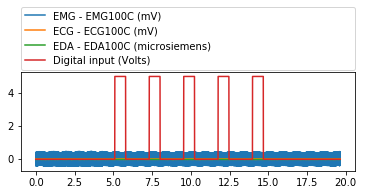

In [18]:
%pylab inline

plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [19]:
ecg = data.channels[1]

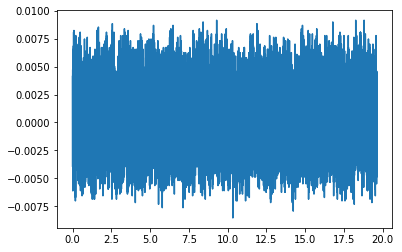

In [37]:
plt.plot(ecg.time_index, ecg.data, label='{} ({})'.format(ecg.name, ecg.units))

In [38]:
type(ecg.time_index)

numpy.ndarray

In [44]:
#ecg_preprocessed = nk.ecg_preprocess(ecg, sampling_rate = "500", filter_type = "")

In [40]:
ecg

Channel ECG - ECG100C: 9818 samples, 500.0 samples/sec, loaded: True

In [41]:
#using neurokit simulate ecg signal function
simData = nk.ecg_simulate(duration = 60, sampling_rate = 500, bpm = 70, noise = 0.01)

In [115]:
type(simData)

numpy.ndarray

In [116]:
shape(simData)

(30000,)

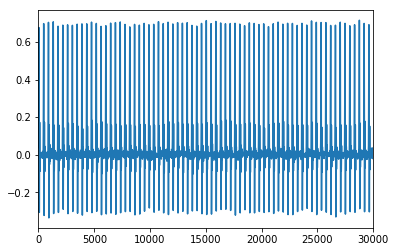

In [43]:
import pandas as pd
pd.Series(simData).plot() #ploting numpy array with pandas

<IPython.core.display.Javascript object>


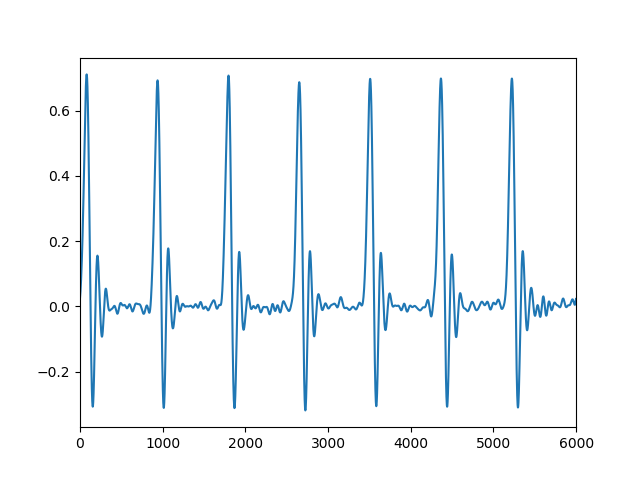

In [49]:
#ploting 6 sec of ecg simulated data with low noise
%matplotlib notebook
import pandas as np
simData2 = nk.ecg_simulate(duration = 6, sampling_rate = 1000, bpm = 70, noise = 0.1)
pd.Series(simData2).plot()

<IPython.core.display.Javascript object>


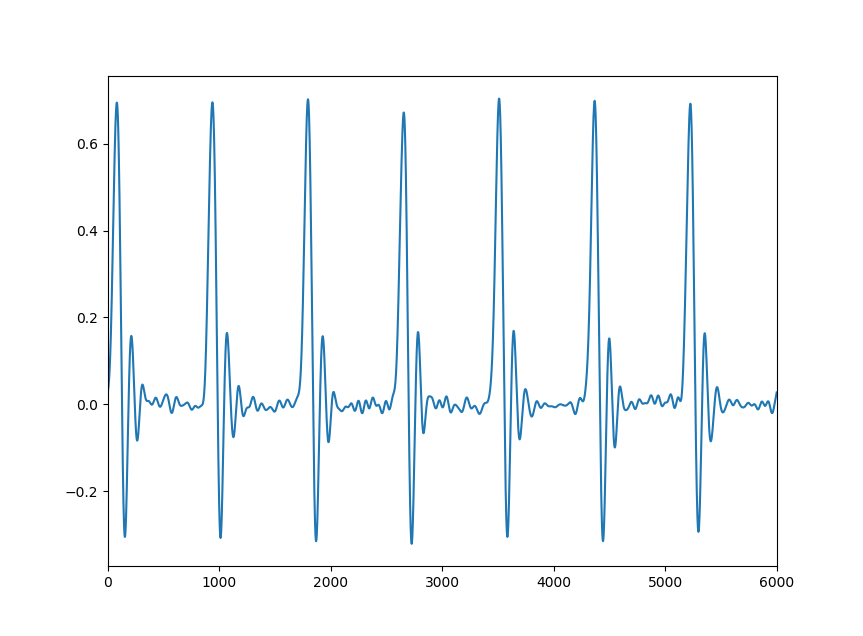

In [53]:
#ploting 6 sec of ecg simulated data with high noise
%matplotlib notebook
import pandas as np
simData2 = nk.ecg_simulate(duration = 6, sampling_rate = 1000, bpm = 70, noise = 0.01)
pd.Series(simData2).plot()

In [50]:
len(simData2)

6000

In [45]:
#pre-processing the simulated ecg data with neurokit
ecg_preprocessed = nk.ecg_preprocess(simData)

In [60]:
r_peaks = ecg_preprocessed['ECG']['R_Peaks']

In [59]:
ecg2

array([  469,   898,  1327,  1755,  2183,  2612,  3041,  3470,  3897,
        4327,  4755,  5184,  5611,  6041,  6468,  6897,  7327,  7755,
        8183,  8612,  9041,  9469,  9897, 10327, 10755, 11184, 11612,
       12041, 12469, 12898, 13326, 13755, 14183, 14612, 15041, 15470,
       15897, 16327, 16755, 17184, 17612, 18041, 18469, 18898, 19326,
       19754, 20183, 20612, 21041, 21469, 21898, 22327, 22755, 23183,
       23612, 24040, 24469, 24898, 25326, 25755, 26184, 26612, 27041,
       27470, 27898, 28327, 28755, 29183])

In [62]:
hrv = nk.ecg_hrv(r_peaks, sampling_rate = 500, hrv_features = 'time')

In [63]:
hrv

{'n_Artifacts': 0.0, 'RR_Intervals': 0     858.0
 1     858.0
 2     856.0
 3     856.0
 4     858.0
 5     858.0
 6     858.0
 7     854.0
 8     860.0
 9     856.0
 10    858.0
 11    854.0
 12    860.0
 13    854.0
 14    858.0
 15    860.0
 16    856.0
 17    856.0
 18    858.0
 19    858.0
 20    856.0
 21    856.0
 22    860.0
 23    856.0
 24    858.0
 25    856.0
 26    858.0
 27    856.0
 28    858.0
 29    856.0
       ...  
 37    856.0
 38    858.0
 39    856.0
 40    858.0
 41    856.0
 42    858.0
 43    856.0
 44    856.0
 45    858.0
 46    858.0
 47    858.0
 48    856.0
 49    858.0
 50    858.0
 51    856.0
 52    856.0
 53    858.0
 54    856.0
 55    858.0
 56    858.0
 57    856.0
 58    858.0
 59    858.0
 60    856.0
 61    858.0
 62    858.0
 63    856.0
 64    858.0
 65    856.0
 66    856.0
 Length: 67, dtype: float64, 'RMSSD': 2.5465365665641806, 'meanNN': 857.1343283582089, 'sdNN': 1.4449024543783127, 'cvNN': 0.0016857363036035897, 'CVSD': 0.002970988889736

In [66]:
rmssd = hrv['RMSSD']
rmssd

2.5465365665641806

In [67]:
sdNN = hrv['sdNN']
sdNN

1.4449024543783127

# Opening data with bioread and analysis with neurokit

In [69]:
cd C:\Users\Ruddy\Desktop\signal data\test2

C:\Users\Ruddy\Desktop\signal data\test2


In [70]:
data = bioread.read_file("3Registros_test2.acq")

Populating the interactive namespace from numpy and matplotlib


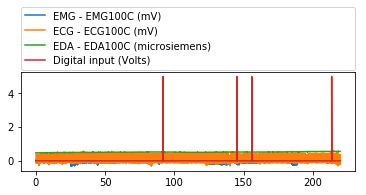

In [71]:
%pylab inline

plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [79]:
#separating the ECG channel data as a numpy array
ecg2 = data.channels[1].data

In [80]:
ecg2

array([-0.08987427, -0.08987427, -0.0944519 , ...,  0.02792358,
        0.02563477,  0.02609253])

In [81]:
type(ecg2)

numpy.ndarray

In [82]:
#pre-processing the ecg data with neurokit
pre_ecg2 = nk.ecg_preprocess(ecg2, sampling_rate = 500)

In [86]:
pre_ecg2

{'df':          ECG_Raw  ECG_Filtered  ECG_R_Peaks  Heart_Rate  ECG_Systole
 0      -0.089874     -0.003798          NaN         NaN            0
 1      -0.089874     -0.004115          NaN         NaN            0
 2      -0.094452     -0.004260          NaN         NaN            0
 3      -0.092773     -0.004087          NaN         NaN            0
 4      -0.084534     -0.003500          NaN         NaN            0
 5      -0.075531     -0.002467          NaN         NaN            0
 6      -0.073700     -0.001021          NaN         NaN            0
 7      -0.076599      0.000743          NaN         NaN            0
 8      -0.076141      0.002688          NaN         NaN            0
 9      -0.070190      0.004650          NaN         NaN            0
 10     -0.063782      0.006460          NaN         NaN            0
 11     -0.062866      0.007962          NaN         NaN            0
 12     -0.066681      0.009027          NaN         NaN            0
 13     -0.065

In [88]:
#getting only the r peaks from the dictionary
r_peaks2 = pre_ecg2['ECG']['R_Peaks']
r_peaks2

array([   218,    582,    944,   1297,   1641,   1974,   2306,   2648,
         2994,   3343,   3714,   4126,   4500,   4847,   5205,   5557,
         5919,   6297,   6667,   7018,   7361,   7737,   8101,   8474,
         8859,   9253,   9626,   9987,  10337,  10695,  11065,  11455,
        11853,  12229,  12599,  12956,  13293,  13625,  13974,  14339,
        14695,  15053,  15421,  15782,  16125,  16461,  16811,  17178,
        17578,  17984,  18395,  18799,  19198,  19608,  20050,  20492,
        20934,  21377,  21836,  22292,  22743,  23205,  23666,  24125,
        24559,  24961,  25329,  25691,  26035,  26374,  26699,  27024,
        27359,  27719,  28114,  28530,  28969,  29411,  29846,  30300,
        30794,  31271,  31737,  32193,  32645,  33087,  33515,  33908,
        34273,  34632,  34995,  35376,  35771,  36142,  36503,  36887,
        37281,  37694,  38072,  38441,  38824,  39210,  39573,  39919,
        40258,  40608,  40958,  41325,  41682,  42025,  42369,  42727,
      

In [90]:
hrv2 = nk.ecg_hrv(r_peaks2, sampling_rate = 500)
hrv2

    Using multitaper spectrum estimation with 2 DPSS windows
NeuroKit warning: complexity_entropy_multiscale(): Signal might be to short to compute SampEn for scale factors > 6. Setting max_scale_factor to 6.


C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'n_Artifacts': 0.020761245674740483, 'RR_Intervals': 1      724.0
 2      706.0
 3      688.0
 4      666.0
 5      664.0
 6      684.0
 7      692.0
 8      698.0
 9      742.0
 10     824.0
 11     748.0
 12     694.0
 13     716.0
 14     704.0
 15     724.0
 16     756.0
 17     740.0
 18     702.0
 19     686.0
 20     752.0
 21     728.0
 22     746.0
 23     770.0
 24     788.0
 25     746.0
 26     722.0
 27     700.0
 28     716.0
 29     740.0
 30     780.0
        ...  
 257    778.0
 258    780.0
 259    750.0
 260    738.0
 261    782.0
 262    840.0
 263    874.0
 264    888.0
 265    850.0
 266    794.0
 267    806.0
 268    830.0
 269    856.0
 270    770.0
 271    754.0
 272    786.0
 273    802.0
 274    814.0
 275    792.0
 276    760.0
 277    808.0
 278    858.0
 279    868.0
 280    758.0
 281    740.0
 282    758.0
 283    726.0
 284    710.0
 285    728.0
 286    724.0
 Length: 283, dtype: float64, 'RMSSD': 31.91789111219044, 'meanNN': 761.0600706713781, 'sdNN'

In [91]:
lf_hf = hrv2['LF/HF']
lf_hf

2.187938088986072

# Opening data with wfdb

In [92]:
cd C:\Users\Ruddy\Desktop\signal data\test2\physionet

C:\Users\Ruddy\Desktop\signal data\test2\physionet


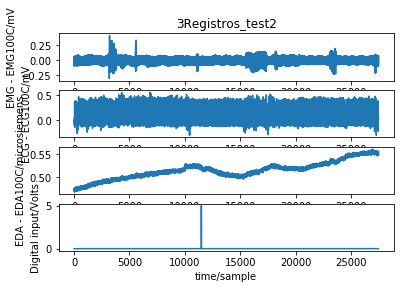

{'record_name': '3Registros_test2_acq_hea',
 'n_sig': 4,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 27463,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['EMG - EMG100C',
  'ECG - ECG100C',
  'EDA - EDA100C',
  'Digital input'],
 'p_signal': array([[ 0.03111624, -0.08986001,  0.47148681,  0.        ],
        [-0.09124424, -0.08453068,  0.47301199,  0.        ],
        [ 0.05858722, -0.07614093,  0.47148681,  0.        ],
        ...,
        [ 0.07507231,  0.00624394,  0.54778018,  0.        ],
        [-0.08544439,  0.00777415,  0.54930536,  0.        ],
        [ 0.0665166 ,  0.01632219,  0.55693127,  0.        ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['d.03Registros_test2_acq_hea',
  'd.13Registros_test2_acq_hea',
  'd.23Registros_test2_acq_hea',
  'd.33Registros_test2_acq_hea'],
 'fmt': ['16', '16', '16', '16'],
 'samps_per_frame': [1, 1, 1, 1],
 'skew': [None, None, None, None],
 'byte_offs

In [93]:
from IPython.display import display
record = wfdb.rdrecord('3Registros_test2_acq_hea')
wfdb.plot_wfdb(record = record, title = '3Registros_test2')
display(record.__dict__)

In [100]:
file = '3Registros_test2_acq_hea'
ecg = wfdb.rdrecord(file, channels = [1])  #open only ecg channel

In [160]:
ecg2 = wfdb.rdsamp(file, channels = [1])

In [161]:
type(ecg2)

tuple

In [105]:
ecg2

(array([[-0.08986001],
        [-0.08453068],
        [-0.07614093],
        ...,
        [ 0.00624394],
        [ 0.00777415],
        [ 0.01632219]]),
 {'fs': 125,
  'sig_len': 27463,
  'n_sig': 1,
  'base_date': None,
  'base_time': None,
  'units': ['mV'],
  'sig_name': ['ECG - ECG100C'],
  'comments': []})

In [130]:
ecg3 = ecg2[0]

In [131]:
ecg3

array([[-0.08986001],
       [-0.08453068],
       [-0.07614093],
       ...,
       [ 0.00624394],
       [ 0.00777415],
       [ 0.01632219]])

In [132]:
type(ecg3)

numpy.ndarray

In [133]:
shape(ecg3)
#s_ecg3 = pd.Series(ecg3)
#type(s_ecg3)

(27463, 1)

In [134]:
ecg3[:5,0]

array([-0.08986001, -0.08453068, -0.07614093, -0.06667828, -0.0540145 ])

In [141]:
s_ecg3 = pd.Series(ecg3[:,0])

In [142]:
s_ecg3

0       -0.089860
1       -0.084531
2       -0.076141
3       -0.066678
4       -0.054015
5       -0.055386
6       -0.059959
7       -0.050954
8       -0.045150
9       -0.044552
10      -0.045009
11      -0.037077
12      -0.034632
13      -0.046838
14      -0.050954
15      -0.026998
16      -0.008530
17      -0.023639
18      -0.047911
19      -0.044394
20      -0.033102
21      -0.031888
22      -0.040419
23      -0.041192
24      -0.031431
25      -0.017852
26      -0.013877
27      -0.016621
28      -0.027456
29      -0.042564
           ...   
27433   -0.056442
27434   -0.036760
27435   -0.025468
27436   -0.022724
27437    0.011274
27438    0.098707
27439    0.273889
27440    0.381760
27441    0.255720
27442   -0.062088
27443   -0.223533
27444   -0.196517
27445   -0.072782
27446   -0.012804
27447   -0.032644
27448   -0.071410
27449   -0.076282
27450   -0.071410
27451   -0.074452
27452   -0.070495
27453   -0.051112
27454   -0.019822
27455   -0.027297
27456   -0.018151
27457    0

In [143]:
s_ecg3.describe()

count    27463.000000
mean        -0.001405
std          0.085880
min         -0.303491
25%         -0.044552
50%         -0.018767
75%          0.023023
max          0.554198
dtype: float64

In [145]:
ecg3_prep = nk.ecg_preprocess(s_ecg3)
ecg3_prep

{'df':         ECG_Raw  ECG_Filtered  ECG_R_Peaks  Heart_Rate  ECG_Systole
 0     -0.089860     -0.003807          NaN         NaN            0
 1     -0.084531      0.004223          NaN         NaN            0
 2     -0.076141      0.011915          NaN         NaN            0
 3     -0.066678      0.018953          NaN         NaN            0
 4     -0.054015      0.025061          NaN         NaN            0
 5     -0.055386      0.030019          NaN         NaN            0
 6     -0.059959      0.033676          NaN         NaN            0
 7     -0.050954      0.035963          NaN         NaN            0
 8     -0.045150      0.036890          NaN         NaN            0
 9     -0.044552      0.036546          NaN         NaN            0
 10    -0.045009      0.035096          NaN         NaN            0
 11    -0.037077      0.032762          NaN         NaN            0
 12    -0.034632      0.029816          NaN         NaN            0
 13    -0.046838      0.0265

In [146]:
r_peaks = ecg3_prep['ECG']['R_Peaks']
r_peaks

array([  356,   956,  1151,  1694,  2611,  2990,  3351,  3973,  4827,
        5372,  5487,  5714,  6168,  6702,  7489,  7846,  8777,  9250,
        9638,  9734, 10328, 10978, 11149, 11406, 11756, 12190, 12458,
       13275, 14033, 14976, 15571, 15769, 15828, 16237, 16696, 17563,
       18317, 18542, 19084, 19305, 19901, 20077, 20423, 20981, 21189,
       21503, 22019, 22339, 22753, 23228, 24413, 24899, 25426, 25925,
       26127, 26638])

In [157]:
r_peaks.shape

(56,)

In [148]:
hrv = nk.ecg_hrv(r_peaks, sampling_rate = 500)
hrv

    Using multitaper spectrum estimation with 7 DPSS windows
NeuroKit warning: complexity_entropy_multiscale(): Signal might be to short to compute SampEn for scale factors > 0. Setting max_scale_factor to 0.


C:\ProgramData\Anaconda3\lib\site-packages\neurokit\signal\complexity.py:526: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


{'n_Artifacts': 0.5636363636363636, 'RR_Intervals': 0     1200.0
 2     1086.0
 4      758.0
 5      722.0
 11     908.0
 12    1068.0
 14     714.0
 16     946.0
 17     776.0
 19    1188.0
 20    1300.0
 24     868.0
 32     818.0
 33     918.0
 37    1084.0
 39    1192.0
 41     692.0
 45    1032.0
 47     828.0
 48     950.0
 50     972.0
 51    1054.0
 52     998.0
 54    1022.0
 dtype: float64, 'RMSSD': 232.5439649876425, 'meanNN': 962.25, 'sdNN': 168.84704938777142, 'cvNN': 0.17547108276203838, 'CVSD': 0.24166689008848274, 'medianNN': 961.0, 'madNN': 124.0, 'mcvNN': 0.12903225806451613, 'pNN50': 79.16666666666666, 'pNN20': 95.83333333333334, 'df':        ECG_RR_Interval  ECG_HRV_ULF  ECG_HRV_VLF  ECG_HRV_LF  ECG_HRV_HF  \
 0          1200.000000   183.640418    65.589060  325.490038   81.918124   
 1          1199.981038   149.185457    73.437359  247.419581   64.878786   
 2          1199.961610   149.170408    73.594661  247.311391   64.934267   
 3          1199.941717   137.

In [150]:
type(hrv)

dict

In [151]:
#extracting the data columns of the hrv dict
ecgDB = hrv['df']
ecgDB

,ECG_RR_Interval,ECG_HRV_ULF,ECG_HRV_VLF,ECG_HRV_LF,ECG_HRV_HF,ECG_HRV_VHF
0,1200.000000,183.640418,65.589060,325.490038,81.918124,5.129262
1,1199.981038,149.185457,73.437359,247.419581,64.878786,4.367414
2,1199.961610,149.170408,73.594661,247.311391,64.934267,4.376715
3,1199.941717,137.941663,76.309314,223.249026,59.500716,4.129774
4,1199.921358,137.927706,76.453793,223.147785,59.548735,4.137052
5,1199.900535,131.274378,78.134333,209.427621,56.380860,3.991665
6,1199.879248,131.261068,78.271160,209.330907,56.424789,3.997771
7,1199.857498,126.553415,79.506005,199.935428,54.215196,3.895475
8,1199.835284,126.540563,79.637399,199.842146,54.256398,3.900768
9,1199.812607,122.907621,80.623329,192.803481,52.573870,3.822203


In [153]:
ecg_baseline = ecgDB['ECG_RR_Interval'].mean()
ecg_baseline

882.8330154079609

In [156]:
#max RR interval
rr_max = ecgDB.iloc[0].max()
rr_max

1200.0

In [167]:
#detecting r peaks with wfdb
ecg_sig, fields = wfdb.rdsamp(file, channels = [0])
xqrs = processing.XQRS(sig = ecg_sig[:,0], fs = fields['fs'])
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


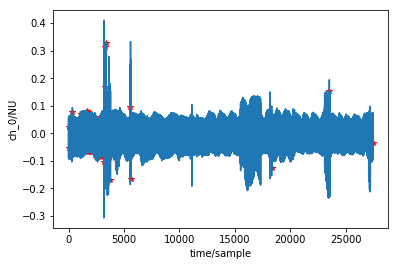

In [168]:
wfdb.plot_items(signal=ecg_sig, ann_samp=[xqrs.qrs_inds])

In [170]:
len(xqrs.qrs_inds)

70

In [171]:
type(xqrs.qrs_inds)

numpy.ndarray

In [172]:
type(xqrs)

wfdb.processing.qrs.XQRS

In [2]:
cd C:\Users\Ruddy\Desktop\signal data\test2

C:\Users\Ruddy\Desktop\signal data\test2


In [4]:
#reading excel with peaks from acqknowledge
import pandas as pd
r_peaks2 = pd.read_excel('rr_peaks.xls', usecols = [0,1])
#r_peaks2 = pd.read_excel('rr_peaks.xls', usecols = [0,1], index_col = None)
r_peaks2.head()  #print head from excel

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,Time,Value
0,0.436,0.395
1,1.164,0.403
2,1.888,0.358
3,2.594,0.356
4,3.282,0.474


In [5]:
r_peaks2.shape  #print size

(106, 2)

In [8]:
#get only r peaks indices from pandas to numpy array
r_inds = r_peaks2.iloc[:,0].to_numpy()


In [9]:
len(ecg_sig)

NameError: name 'ecg_sig' is not defined

In [216]:
hrv2 = processing.compute_hr(len(ecg_sig), xqrs.qrs_inds, fs = fields['fs'])

In [217]:
xqrs.qrs_inds

array([    3,    70,   105,   198,   287,   317,   344,   520,  1095,
        1122,  1207,  1234,  1327,  1388,  1518,  1585,  1630,  1660,
        1691,  1793,  1826,  1888,  1932,  1996,  2056,  2108,  2150,
        2179,  2207,  2236,  2328,  2361,  2399,  2438,  2469,  2495,
        2549,  2587,  2653,  2681,  2723,  2756,  2823,  2852,  2881,
        2919,  2949,  3017,  3050,  3085,  3136,  3189,  3219,  3246,
        3281,  3313,  3370,  3406,  3479,  3515,  3591,  3630,  3745,
        5550,  5584,  5623, 18335, 23521, 23594, 27459])

In [10]:
r_inds  #print inds from excel file

array([ 0.436,  1.164,  1.888,  2.594,  3.282,  3.948,  4.612,  5.296,
        5.988,  6.686,  7.428,  8.252,  9.   ,  9.694, 10.41 , 11.114,
       11.838, 12.594, 13.334, 14.034, 14.722, 15.474, 16.202, 16.946,
       17.716, 18.506, 19.252, 19.974, 20.674, 21.388, 22.128, 22.91 ,
       23.706, 24.458, 25.198, 25.912, 26.586, 27.25 , 27.948, 28.678,
       29.388, 30.108, 30.842, 31.562, 32.25 , 32.922, 33.622, 34.354,
       35.156, 35.968, 36.79 , 37.596, 38.396, 39.216, 40.098, 40.984,
       41.868, 42.756, 43.67 , 44.584, 45.486, 46.41 , 47.332, 48.25 ,
       49.118, 49.922, 50.658, 51.382, 52.07 , 52.748, 53.398, 54.048,
       54.718, 55.44 , 56.228, 57.06 , 57.938, 58.822, 59.692, 60.6  ,
       61.588, 62.542, 63.474, 64.386, 65.29 , 66.174, 67.03 , 67.814,
       68.546, 69.264, 69.99 , 70.754, 71.54 , 72.284, 73.006, 73.774,
       74.56 , 75.388, 76.144, 76.882, 77.648, 78.42 , 79.146, 79.838,
          nan,    nan])

In [11]:
#converting float values in excel file to int 
r_inds2 = r_inds*1000  #multipliying millis for 1000
#int(r_inds2)
r_inds2 = r_inds2[:-2]  #erasing the last two rows
r_inds2 = r_inds2.astype(int)

In [17]:
r_inds2

array([  436,  1164,  1888,  2594,  3282,  3948,  4612,  5296,  5988,
        6686,  7428,  8252,  9000,  9694, 10410, 11114, 11838, 12594,
       13334, 14034, 14722, 15474, 16202, 16946, 17716, 18506, 19252,
       19974, 20674, 21388, 22128, 22910, 23706, 24458, 25198, 25912,
       26586, 27250, 27948, 28678, 29388, 30108, 30842, 31562, 32250,
       32922, 33622, 34354, 35156, 35968, 36790, 37596, 38396, 39216,
       40098, 40984, 41868, 42756, 43670, 44584, 45486, 46410, 47332,
       48250, 49118, 49922, 50658, 51382, 52070, 52748, 53398, 54048,
       54718, 55440, 56228, 57060, 57938, 58822, 59692, 60600, 61588,
       62542, 63474, 64385, 65290, 66174, 67030, 67814, 68546, 69264,
       69990, 70754, 71540, 72284, 73006, 73774, 74560, 75388, 76144,
       76882, 77648, 78420, 79146, 79838])

In [238]:
hrv2 = processing.compute_hr(len(ecg_sig), r_inds2[:25] , fs = fields['fs'])

In [239]:
hrv2

array([      nan,       nan,       nan, ..., 10.080646, 10.080646,
       10.080646], dtype=float32)

In [212]:
fields['fs']

125

In [213]:
type(r_inds)

numpy.ndarray

In [214]:
r_inds[:5]

array([0.436, 1.164, 1.888, 2.594, 3.282])

In [16]:
pd.Series(r_inds).describe() #using pandas to describe rr inds in excel

count    104.000000
mean      39.213000
std       23.551867
min        0.436000
25%       19.065500
50%       37.996000
75%       59.039500
max       79.838000
dtype: float64

In [15]:
from hrv.io import read_from_text

ModuleNotFoundError: No module named 'hrv'

In [18]:
#converting array to DataFrame before exporting csv
my_csv = pd.DataFrame(r_inds2)

In [20]:
#appending a new column to DataFrame
my_csv["column2"] = r_inds2

my_csv.head()

,0,column2
0,436,436
1,1164,1164
2,1888,1888
3,2594,2594
4,3282,3282


In [26]:
#exporting rr_peaks data to csv
my_csv.to_csv('rr_inds_py3.csv', index = False, header = ['rr_peaks', 'rr_peaks2'])
